In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads=pd.read_csv('leads.csv')

In [3]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#converting all values of 'Select' to nan since they are as good as null values, this will give us a better idea of mising values
leads=leads.applymap(lambda x: np.nan if x=='Select' else x)

In [6]:
leads.isnull().sum()/len(leads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
leads['Lead Quality'].value_counts(normalize=True) * 100

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

In [8]:
leads['Lead Profile'].value_counts(normalize=True) * 100

Potential Lead                 67.631027
Other Leads                    20.419287
Student of SomeSchool          10.104822
Lateral Student                 1.006289
Dual Specialization Student     0.838574
Name: Lead Profile, dtype: float64

In [9]:
leads['Tags'].value_counts(normalize=True) * 100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [10]:
leads['Lead Profile'].value_counts(normalize=True) * 100

Potential Lead                 67.631027
Other Leads                    20.419287
Student of SomeSchool          10.104822
Lateral Student                 1.006289
Dual Specialization Student     0.838574
Name: Lead Profile, dtype: float64

In [11]:
#creating list of columns which needs to be dropped based on % of missing values
drop_cols=['Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality',
           'Lead Profile', 'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
           ]

In [12]:
leads.drop(columns=drop_cols, inplace=True)

In [13]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [14]:
leads.isnull().sum()/len(leads) * 100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

### Univariate Analysis and Handling Null Values

In [15]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
leads['Lead Source'].isnull().sum()

36

In [17]:
#we can impute this column with the mode, sicne it is a categerical variable
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

In [18]:
leads['Lead Source'].isnull().sum()

0

In [19]:
leads['Page Views Per Visit'].isnull().sum()

137

In [20]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
#since this is a continous variable we can impute the missing values with the mean
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean(), inplace=True)

In [22]:
leads['Page Views Per Visit'].isnull().sum()

0

In [23]:
leads['Last Activity'].isnull().sum()

103

In [24]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)

In [26]:
leads['Last Activity'].isnull().sum()

0

In [27]:
leads['TotalVisits'].isnull().sum()

137

In [28]:
leads['TotalVisits'].fillna(leads['TotalVisits'].mean(), inplace=True)

In [29]:
leads['TotalVisits'].isnull().sum()

0

In [30]:
leads.isnull().sum()/len(leads) * 100
#all null values have been dealt with

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [31]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.818723                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.362820  
std                2.145333  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [32]:
#dropping 'Lead Number' since it is a unique identifier and is redundant since we already have 'Prospect ID' to uniquely identify the lead
leads.drop(columns='Lead Number', inplace=True)

In [33]:
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [34]:
#checking for outliers
leads[num_vars].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.445238                   487.698268              2.362820
std       4.818723                   548.021466              2.145333
min       0.000000                     0.000000              0.000000
1%        0.000000                     0.000000              0.000000
5%        0.000000                     0.000000              0.000000
50%       3.000000                   248.000000              2.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

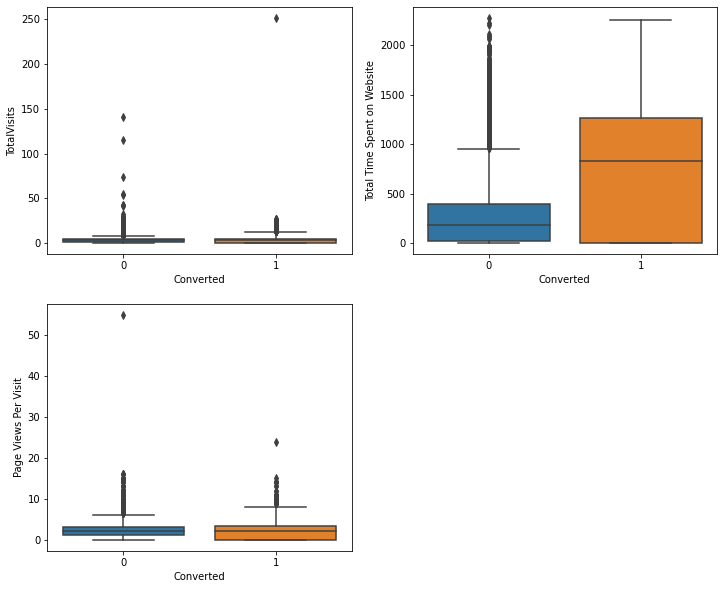

In [35]:
plt.figure(figsize=(12,10))
for i,j in enumerate(num_vars):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=leads, y=j, x='Converted')

In [36]:
drop_ind=[np.where(leads.TotalVisits==leads.TotalVisits.max())[0][0],
          np.where(leads['Page Views Per Visit']==leads['Page Views Per Visit'].max())[0][0]]

In [37]:
drop_ind

[6102, 2190]

In [38]:
#dropping the records containing the outliers
leads.drop(index=drop_ind[0], inplace=True)
leads.drop(index=drop_ind[1], inplace=True)

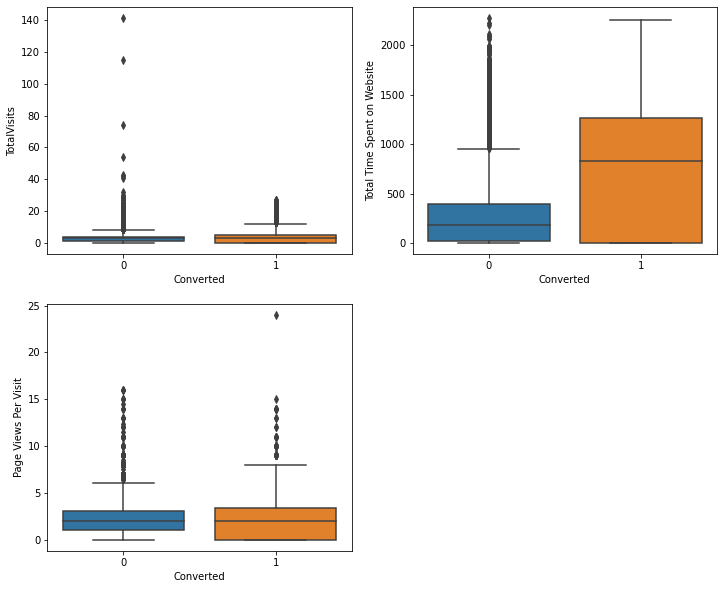

In [39]:
plt.figure(figsize=(12,10))
for i,j in enumerate(num_vars):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=leads, y=j, x='Converted')

In [40]:
leads.drop(index=leads[leads.TotalVisits>40].index, inplace=True)
leads.drop(index=leads[leads['Page Views Per Visit']>20].index, inplace=True)

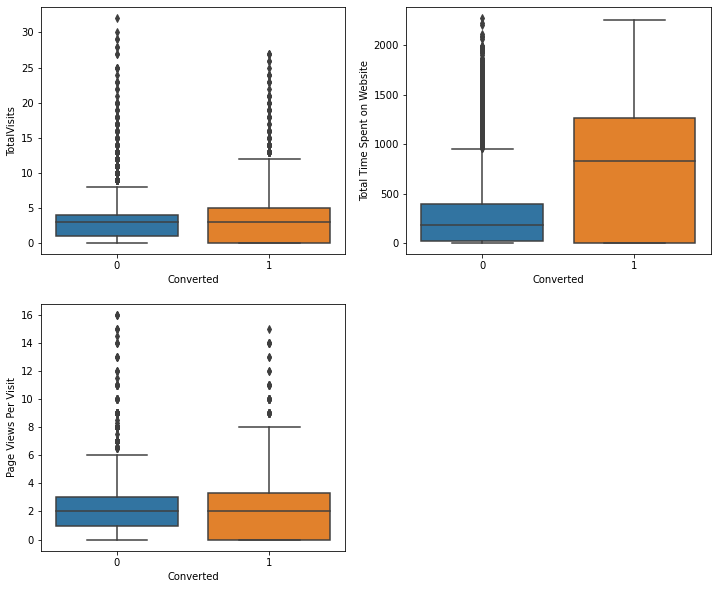

In [41]:
plt.figure(figsize=(12,10))
for i,j in enumerate(num_vars):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=leads, y=j, x='Converted')

In [42]:
leads[num_vars].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9230.000000                  9230.000000           9230.000000
mean      3.357963                   487.487757              2.352260
std       3.400768                   547.994901              2.058795
min       0.000000                     0.000000              0.000000
1%        0.000000                     0.000000              0.000000
5%        0.000000                     0.000000              0.000000
50%       3.000000                   248.000000              2.000000
95%       9.000000                  1562.000000              6.000000
99%      16.000000                  1840.710000              9.000000
max      32.000000                  2272.000000             16.000000

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9230 non-null   object 
 1   Lead Origin                               9230 non-null   object 
 2   Lead Source                               9230 non-null   object 
 3   Do Not Email                              9230 non-null   object 
 4   Do Not Call                               9230 non-null   object 
 5   Converted                                 9230 non-null   int64  
 6   TotalVisits                               9230 non-null   float64
 7   Total Time Spent on Website               9230 non-null   int64  
 8   Page Views Per Visit                      9230 non-null   float64
 9   Last Activity                             9230 non-null   object 
 10  Search                              

In [44]:
#defining function for mapping Yes/No to 1/0
def binary_map(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
    else:
        return x 

In [45]:
leads=leads.applymap(binary_map)

In [46]:
leads.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ...  X Education Forums  Newspaper  Digital Advertisement  \
0  ...                   0          0                      0   
1  ...                   0          0                      0   
2  ...                   0          0                      0   
3  ...                   0          0                      0   
4  ...                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 23 columns]

In [47]:
#Having both columns 'Last Activity' and 'Last Notable Activity' as predictors is irrelevant from a business perspective
#so we can drop the column 'Last Notable Activity'
leads.drop('Last Notable Activity', axis=1, inplace=True)

In [48]:
#identifying cols for which dummy variables need to be created and creating those variables 
dummy_lst=['Lead Origin','Lead Source','Last Activity']
dummy1= pd.get_dummies(leads[dummy_lst])

In [49]:
for col in dummy_lst:
    print(leads[col].value_counts(), end='\n\n')

Landing Page Submission    4877
API                        3579
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2904
Direct Traffic       2536
Olark Chat           1755
Organic Search       1153
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Email Opened                    3539
SMS Sent                        2744
Olark Chat Conversation          973
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    326
Email 

In [50]:
leads['Lead Source'].value_counts()[:8].index

Index(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference',
       'Welingak Website', 'Referral Sites', 'Facebook'],
      dtype='object')

In [51]:
#some cleaning and clumping low value count catagories into one single catagory 'Others'
leads['Lead Source']=leads['Lead Source'].apply(lambda x: 'Google' if x=='google' else 'Others' if x not in (leads['Lead Source'].value_counts()[:8].index) else x)

In [52]:
leads['Last Activity'].value_counts()[:10].index

Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed'],
      dtype='object')

In [53]:
leads['Last Activity']=leads['Last Activity'].apply(lambda x: 'Others' if x not in (leads['Last Activity'].value_counts()[:10].index) else x)

In [54]:
for col in dummy_lst:
    print(leads[col].value_counts(), end='\n\n')

Landing Page Submission    4877
API                        3579
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google              2909
Direct Traffic      2536
Olark Chat          1755
Organic Search      1153
Reference            534
Welingak Website     142
Referral Sites       123
Facebook              55
Others                23
Name: Lead Source, dtype: int64

Email Opened                 3539
SMS Sent                     2744
Olark Chat Conversation       973
Page Visited on Website       632
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64



In [55]:
#creating the dummies again
dummy1= pd.get_dummies(leads[dummy_lst])

In [56]:
dummy1.head()

Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
0                     0                   0                       1   
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   1                       0   

   Lead Source_Organic Search  ...  Last Activity_Email Bounced  \
0                           0  ...                            0   
1                           1  ...                            0   
2                           0  ...                            0   
3                           0  ...                            0   
4                           0  ...                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  
0                          0                           0  
1                          0                           0  
2                          0                           0  
3                          1                           0  
4                          0                           0  

[5 rows x 25 columns]

In [57]:
#cols to drop from dummy df before concatinating with main df, these columns are based on frequency and occurance
dum_drop=['Lead Origin_Quick Add Form','Lead Source_Others','Last Activity_Others']
dummy1.drop(columns=dum_drop, inplace=True)

In [58]:
#concatinate with main dataframe and drop the repeated variables
leads=pd.concat([leads,dummy1], axis=1)
leads.drop(columns=dummy_lst, inplace=True)

In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9230 non-null   object 
 1   Do Not Email                              9230 non-null   int64  
 2   Do Not Call                               9230 non-null   int64  
 3   Converted                                 9230 non-null   int64  
 4   TotalVisits                               9230 non-null   float64
 5   Total Time Spent on Website               9230 non-null   int64  
 6   Page Views Per Visit                      9230 non-null   float64
 7   Search                                    9230 non-null   int64  
 8   Magazine                                  9230 non-null   int64  
 9   Newspaper Article                         9230 non-null   int64  
 10  X Education Forums                  

In [60]:
#looking at the categorical variables
cat_vars=leads.loc[:, ~leads.columns.isin(num_vars)].columns[1:]
cat_vars

Index(['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activi

In [61]:
len(cat_vars)

37

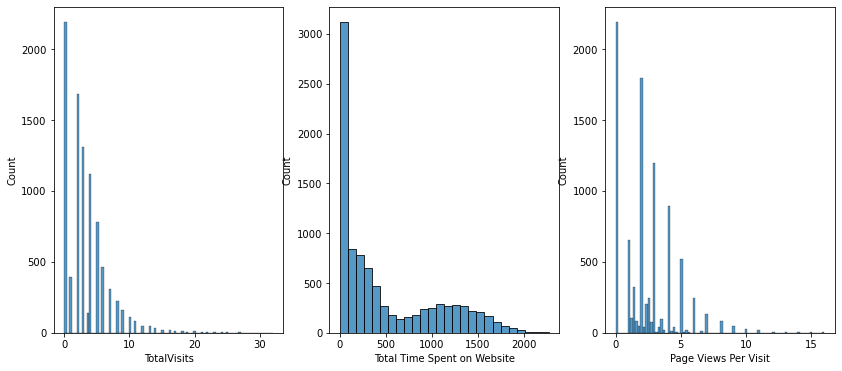

In [62]:
plt.figure(figsize=(14,6))
for i,j in enumerate(num_vars):
    plt.subplot(1,3,i+1)
    sns.histplot(data=leads, x=j)

### Bivariate Analysis

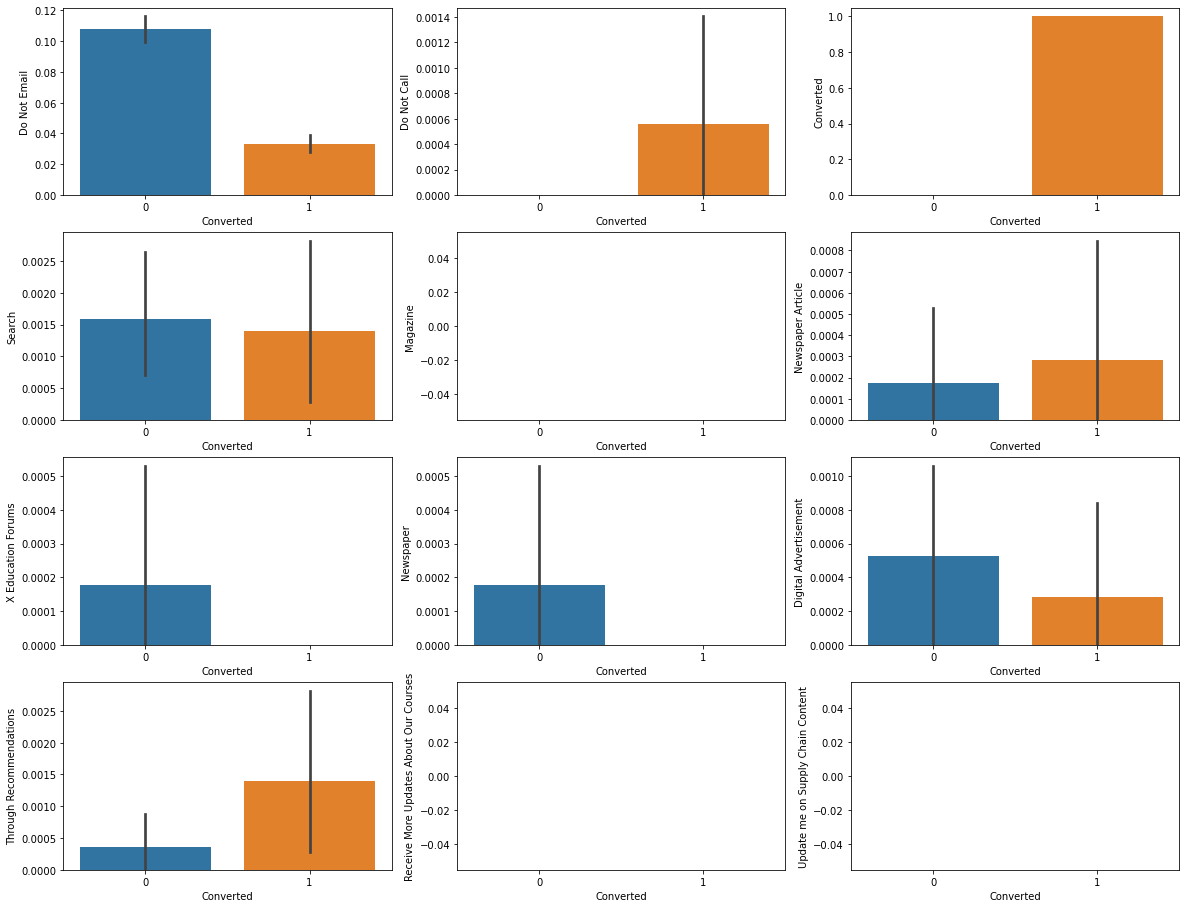

In [63]:
#conducting bivariate analysis in parts
plt.figure(figsize=(20,20))
for i,j in enumerate(cat_vars[:12]):
    plt.subplot(5,3,i+1)
    sns.barplot(data=leads, x='Converted', y=j)

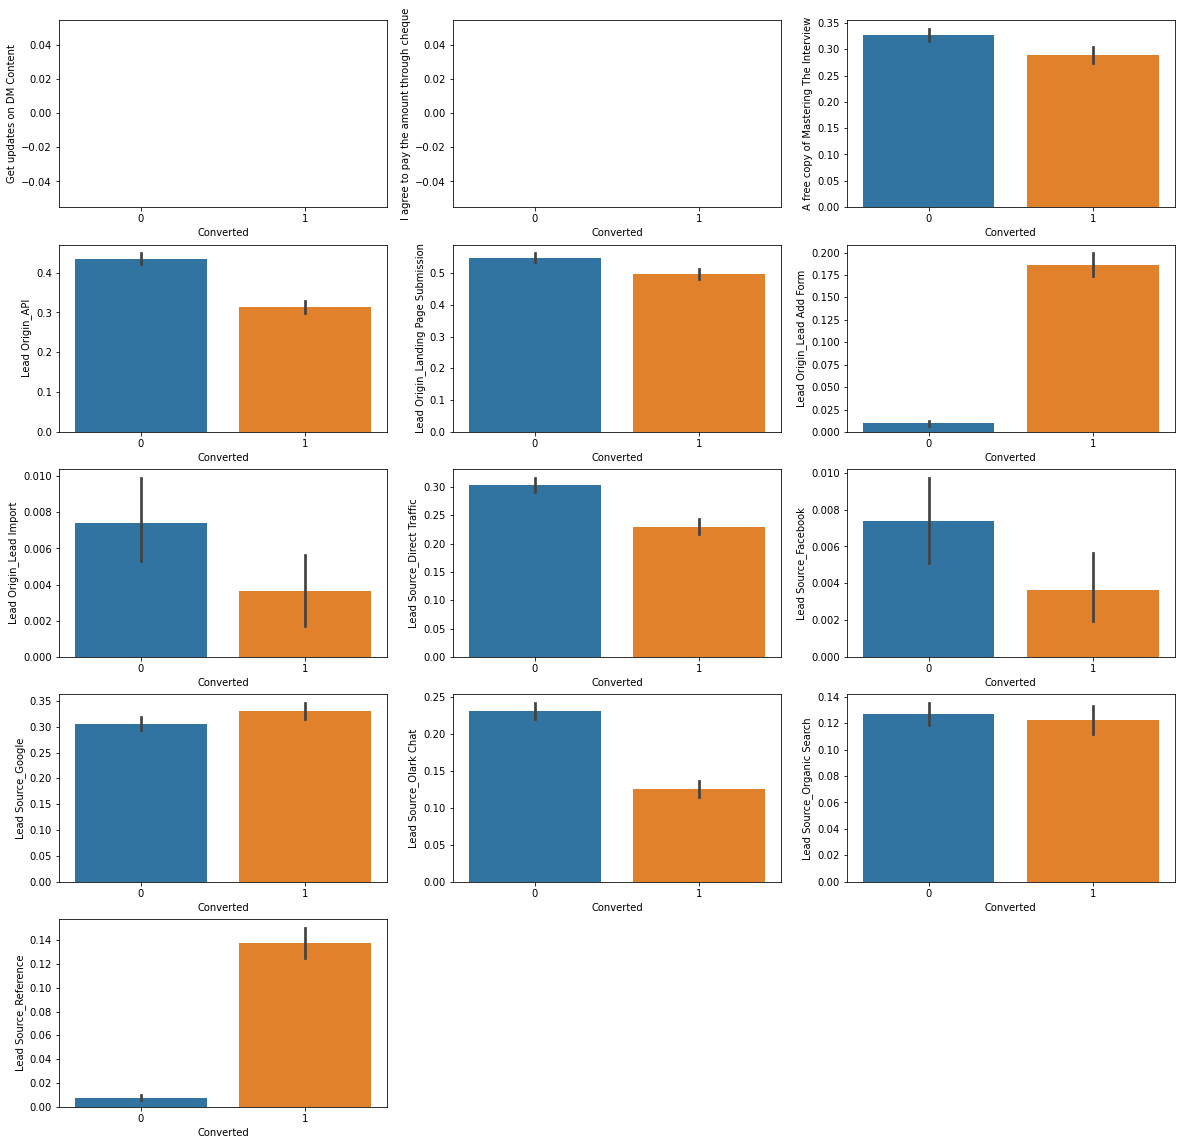

In [64]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cat_vars[12:25]):
    plt.subplot(5,3,i+1)
    sns.barplot(data=leads, x='Converted', y=j)

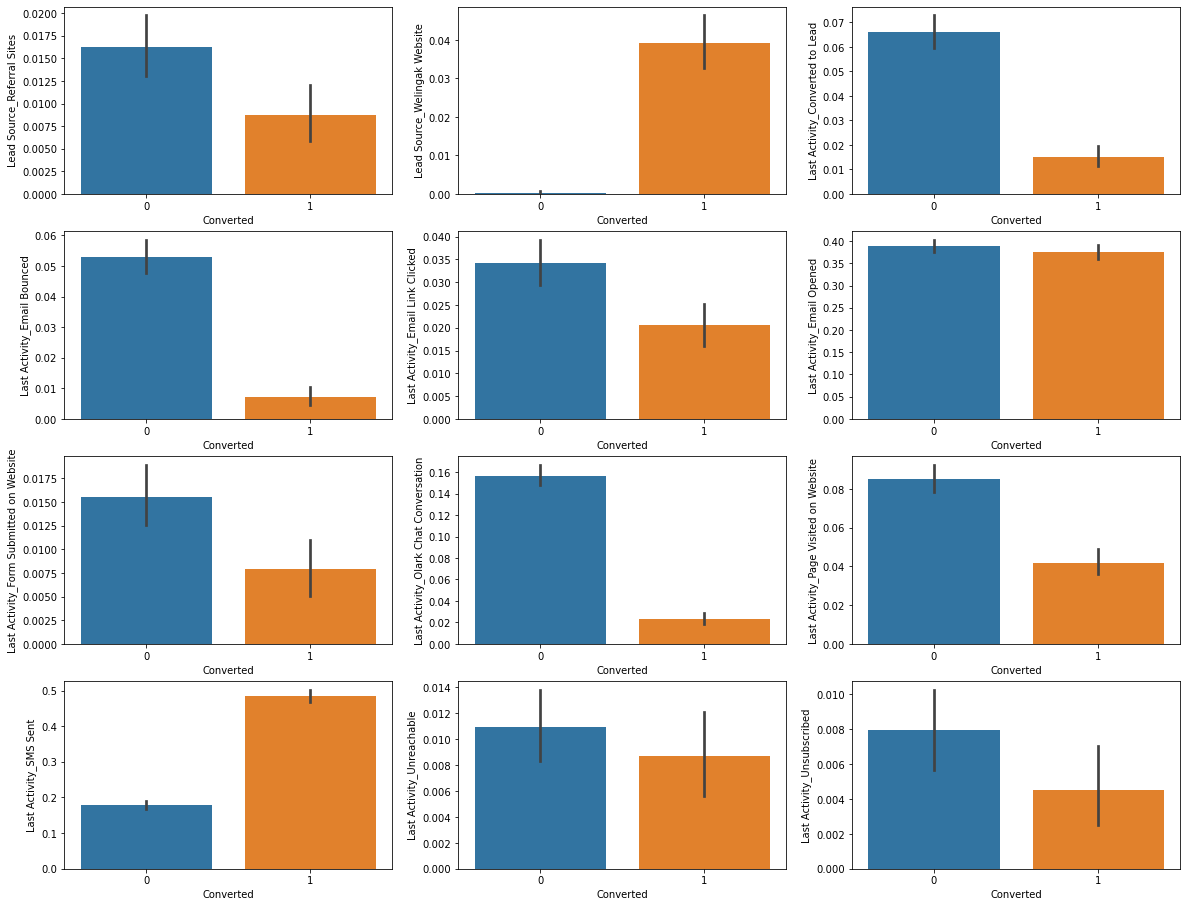

In [65]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cat_vars[25:]):
    plt.subplot(5,3,i+1)
    sns.barplot(data=leads, x='Converted', y=j)

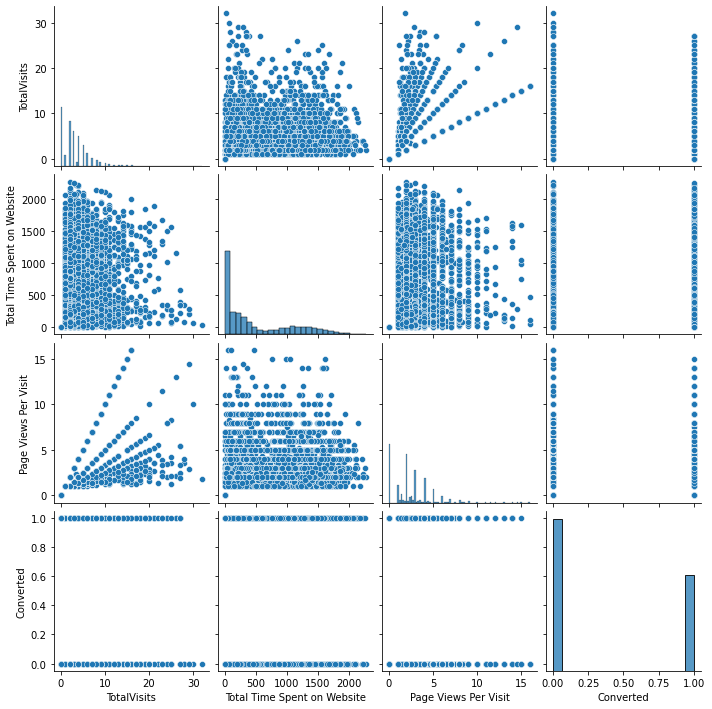

In [66]:
sns.pairplot(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

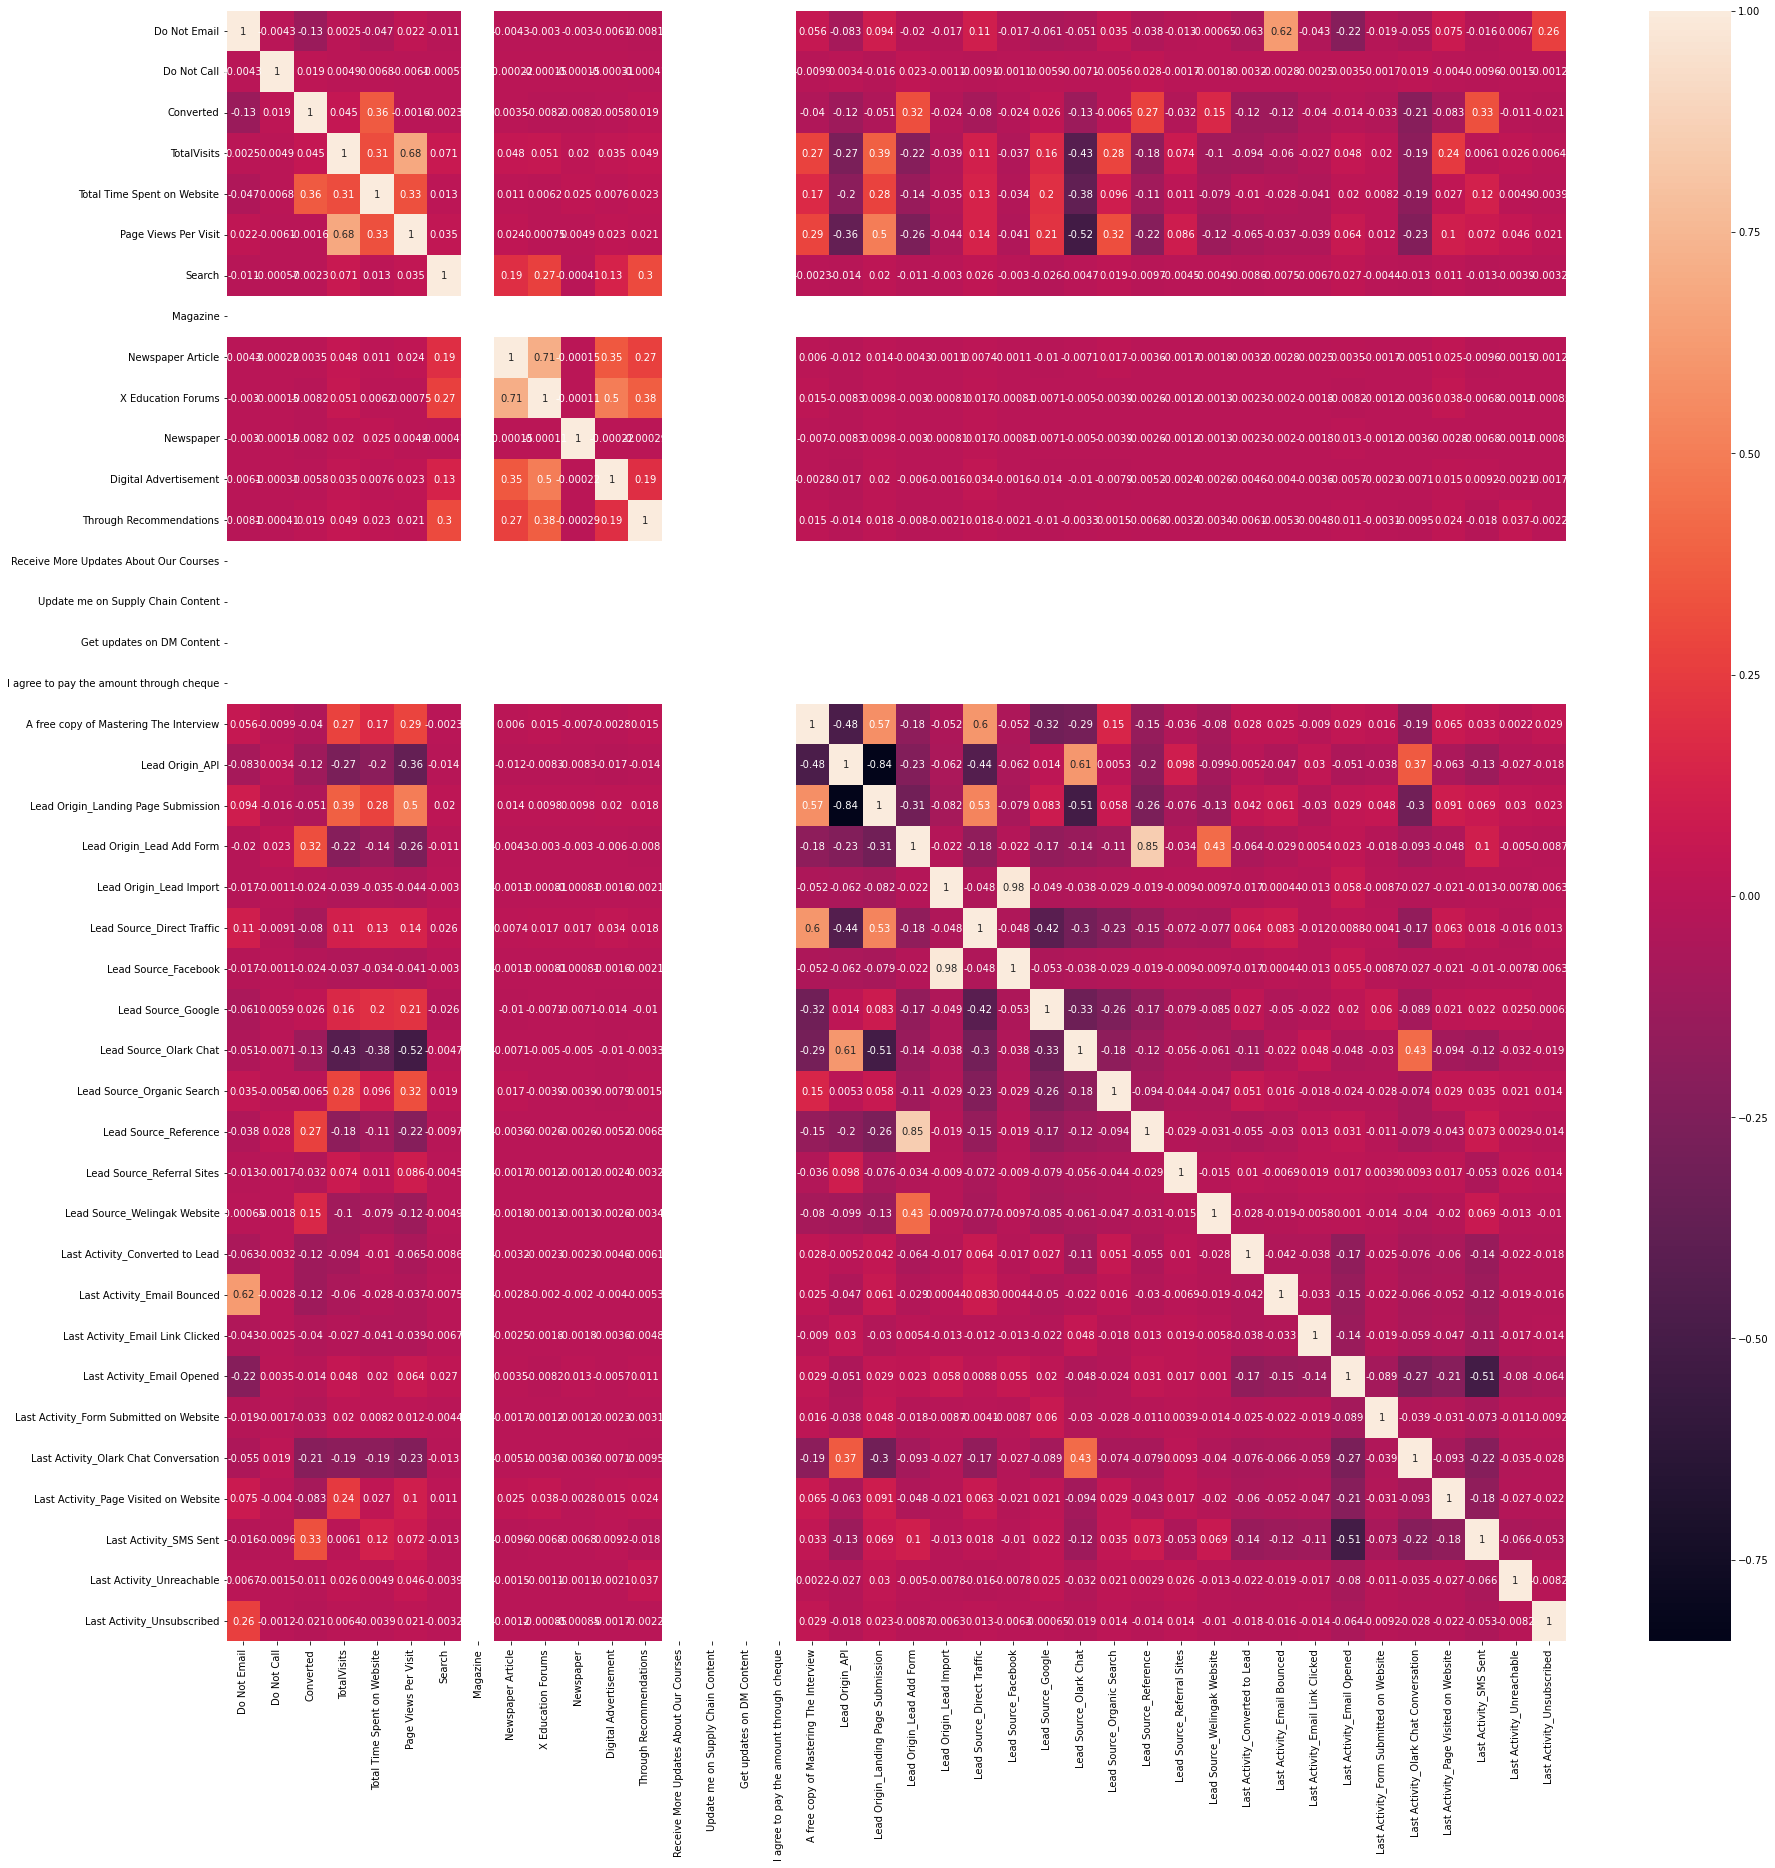

In [67]:
plt.figure(figsize = (30,30))        
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [68]:
leads.corr()

Do Not Email  Do Not Call  \
Do Not Email                                  1.000000    -0.004308   
Do Not Call                                  -0.004308     1.000000   
Converted                                    -0.134368     0.018583   
TotalVisits                                   0.002465     0.004944   
Total Time Spent on Website                  -0.047185     0.006811   
Page Views Per Visit                          0.022146    -0.006095   
Search                                       -0.011405    -0.000574   
Magazine                                           NaN          NaN   
Newspaper Article                            -0.004308    -0.000217   
X Education Forums                           -0.003046    -0.000153   
Newspaper                                    -0.003046    -0.000153   
Digital Advertisement                        -0.006093    -0.000307   
Through Recommendations                      -0.008062    -0.000406   
Receive More Updates About Our Courses             NaN          NaN   
Update me on Supply Chain Content                  NaN          NaN   
Get updates on DM Content                          NaN          NaN   
I agree to pay the amount through cheque           NaN          NaN   
A free copy of Mastering The Interview        0.055887    -0.009927   
Lead Origin_API                              -0.082733     0.003391   
Lead Origin_Landing Page Submission           0.093673    -0.015583   
Lead Origin_Lead Add Form                    -0.020456     0.023207   
Lead Origin_Lead Import                      -0.017433    -0.001140   
Lead Source_Direct Traffic                    0.107133    -0.009061   
Lead Source_Facebook                         -0.017433    -0.001140   
Lead Source_Google                           -0.060946     0.005857   
Lead Source_Olark Chat                       -0.050624    -0.007133   
Lead Source_Organic Search                    0.035328    -0.005562   
Lead Source_Reference                        -0.038080     0.027880   
Lead Source_Referral Sites                   -0.012975    -0.001711   
Lead Source_Welingak Website                 -0.000653    -0.001840   
Last Activity_Converted to Lead              -0.062615    -0.003246   
Last Activity_Email Bounced                   0.621236    -0.002817   
Last Activity_Email Link Clicked             -0.043310    -0.002541   
Last Activity_Email Opened                   -0.223315     0.003530   
Last Activity_Form Submitted on Website      -0.018580    -0.001661   
Last Activity_Olark Chat Conversation        -0.054638     0.018916   
Last Activity_Page Visited on Website         0.075045    -0.003991   
Last Activity_SMS Sent                       -0.016206    -0.009576   
Last Activity_Unreachable                     0.006700    -0.001485   
Last Activity_Unsubscribed                    0.263857    -0.001201   

                                          Converted  TotalVisits  \
Do Not Email                              -0.134368     0.002465   
Do Not Call                                0.018583     0.004944   
Converted                                  1.000000     0.045462   
TotalVisits                                0.045462     1.000000   
Total Time Spent on Website                0.362918     0.309880   
Page Views Per Visit                      -0.001616     0.678337   
Search                                    -0.002278     0.071215   
Magazine                                        NaN          NaN   
Newspaper Article                          0.003460     0.048236   
X Education Forums                        -0.008246     0.050942   
Newspaper                                 -0.008246     0.020332   
Digital Advertisement                     -0.005800     0.034547   
Through Recommendations                    0.018604     0.049180   
Receive More Updates About Our Courses          NaN          NaN   
Update me on Supply Chain Content               NaN          NaN   
Get updates on DM Content                 

In [69]:
leads.Magazine.value_counts()

0    9230
Name: Magazine, dtype: int64

In [70]:
leads['Receive More Updates About Our Courses'].value_counts()

0    9230
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
lst=['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
     'I agree to pay the amount through cheque']

In [72]:
#we can see that some rows have all values equal to zero, hence they will not have any impact on predictive power. So we can drop them
leads.drop(columns=lst, inplace=True)

In [73]:
#filtering the correlation matrix for better understanding
condition=leads.corr()[(leads.corr()>0.5)|(leads.corr()<(-0.5))]

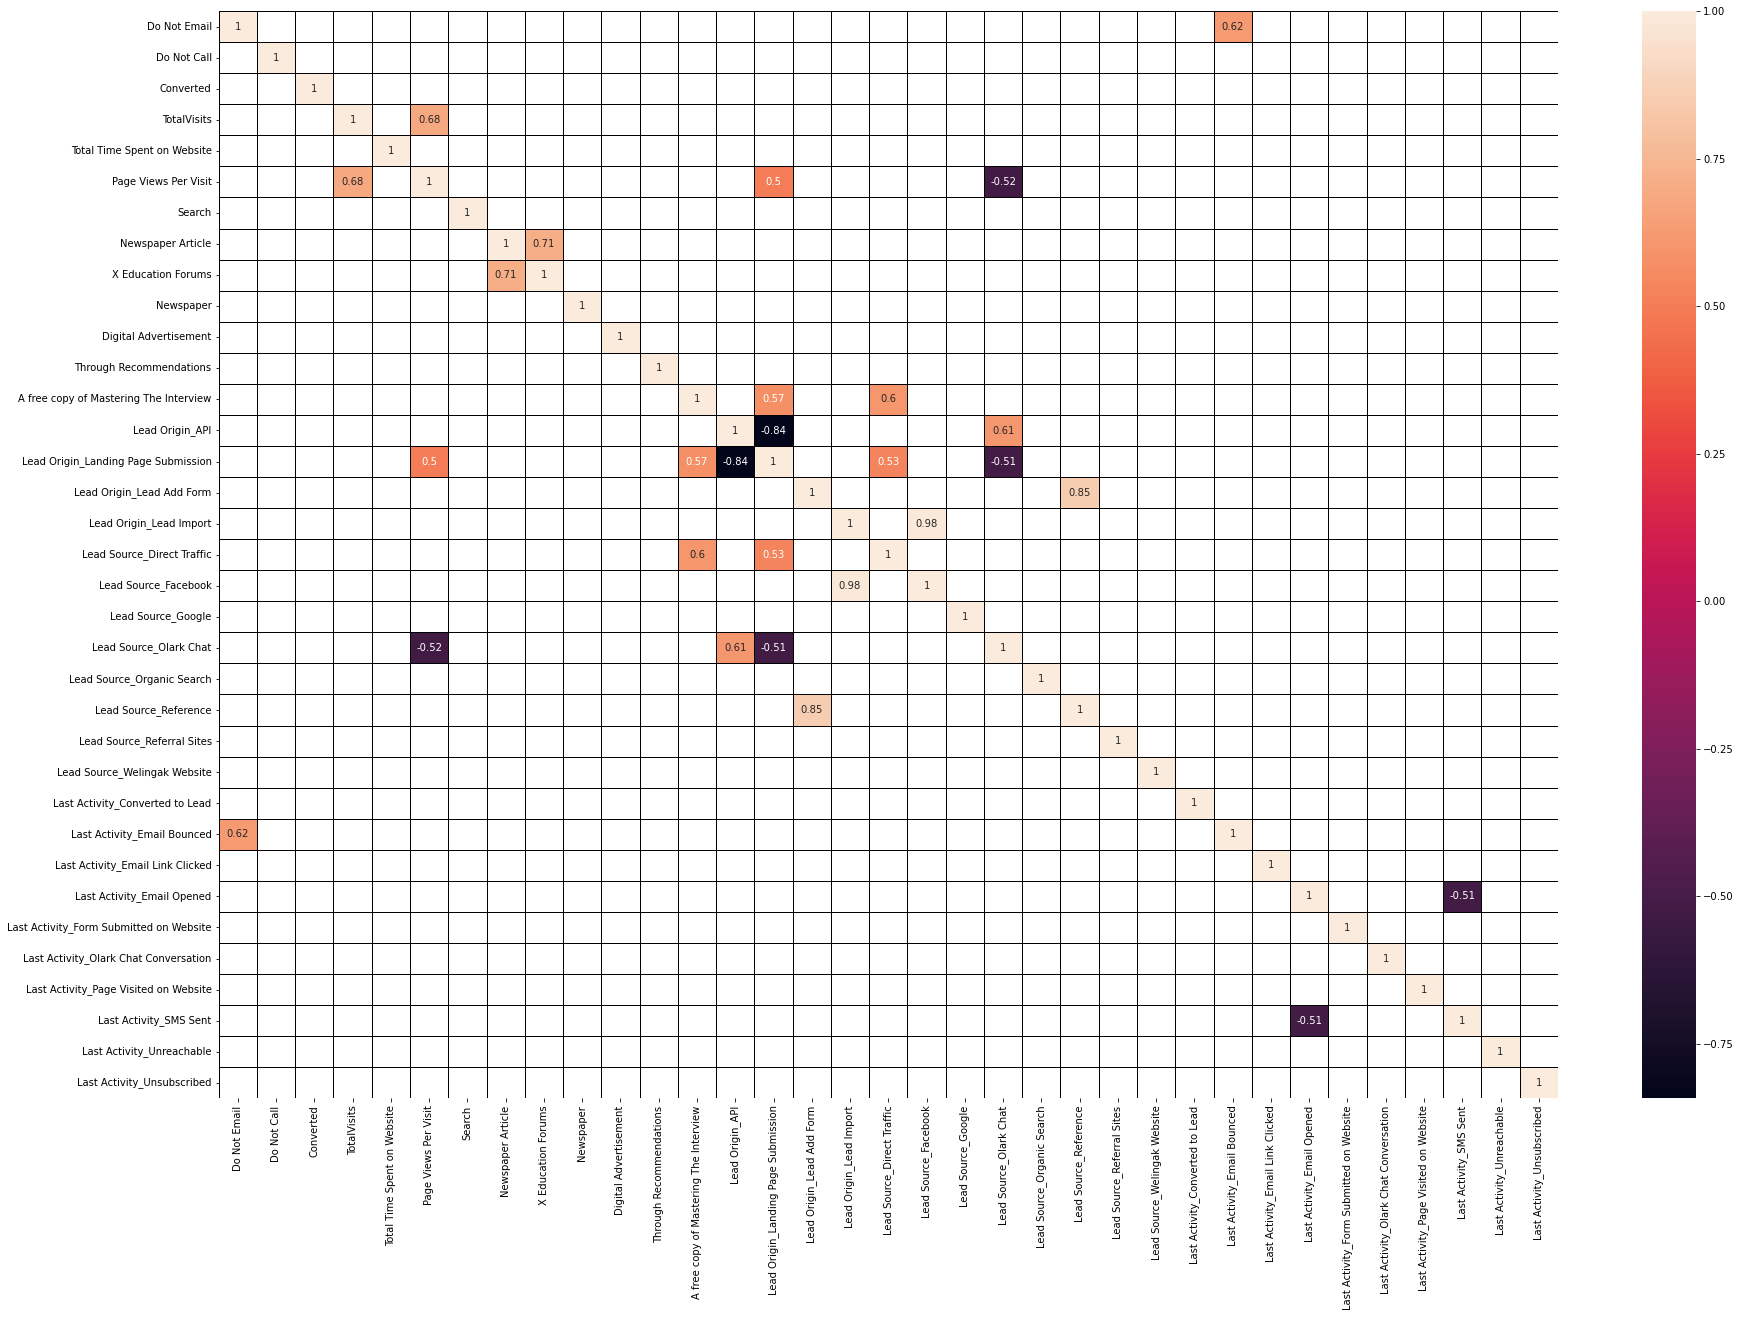

In [74]:
plt.figure(figsize = (30,20))        
sns.heatmap(condition ,annot = True, linewidths=1, linecolor='Black')
plt.show()

In [75]:
#choosing some highly correlated dummy variables that can be dropped
drop_var=['Lead Origin_Landing Page Submission','Last Activity_Email Bounced','Last Activity_Email Bounced',
          'Lead Origin_Lead Add Form','Lead Origin_Lead Import','Last Activity_Email Opened']

In [76]:
leads.drop(columns=drop_var, inplace=True)

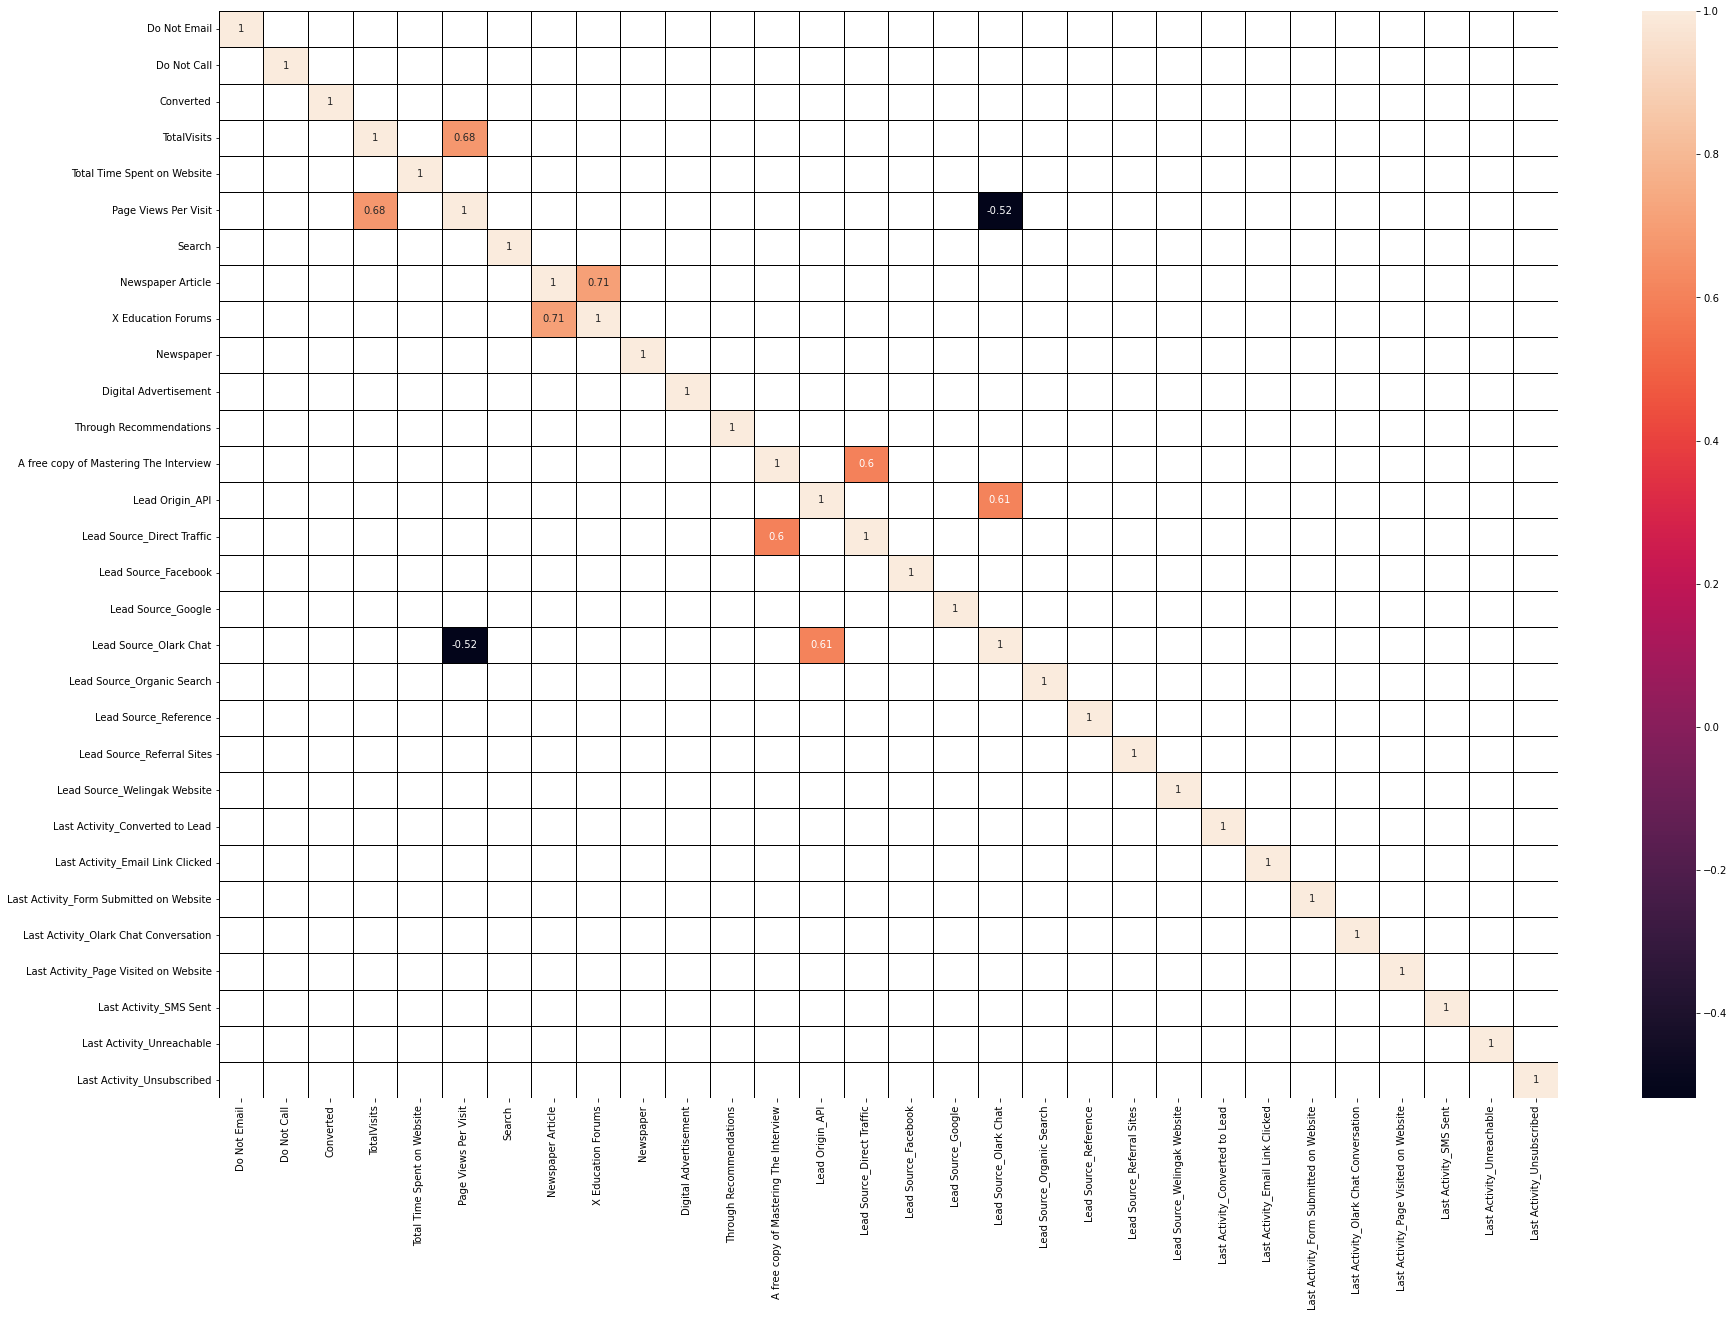

In [77]:
condition=leads.corr()[(leads.corr()>0.5)|(leads.corr()<(-0.5))]
plt.figure(figsize = (30,20))        
sns.heatmap(condition ,annot = True, linewidths=1, linecolor='Black')
plt.show()

In [78]:
#choosing to drop further variables which are either correlated of redundant
drop_var=['Newspaper Article','Page Views Per Visit','Lead Origin_API','A free copy of Mastering The Interview']

In [79]:
leads.drop(columns=drop_var, inplace=True)

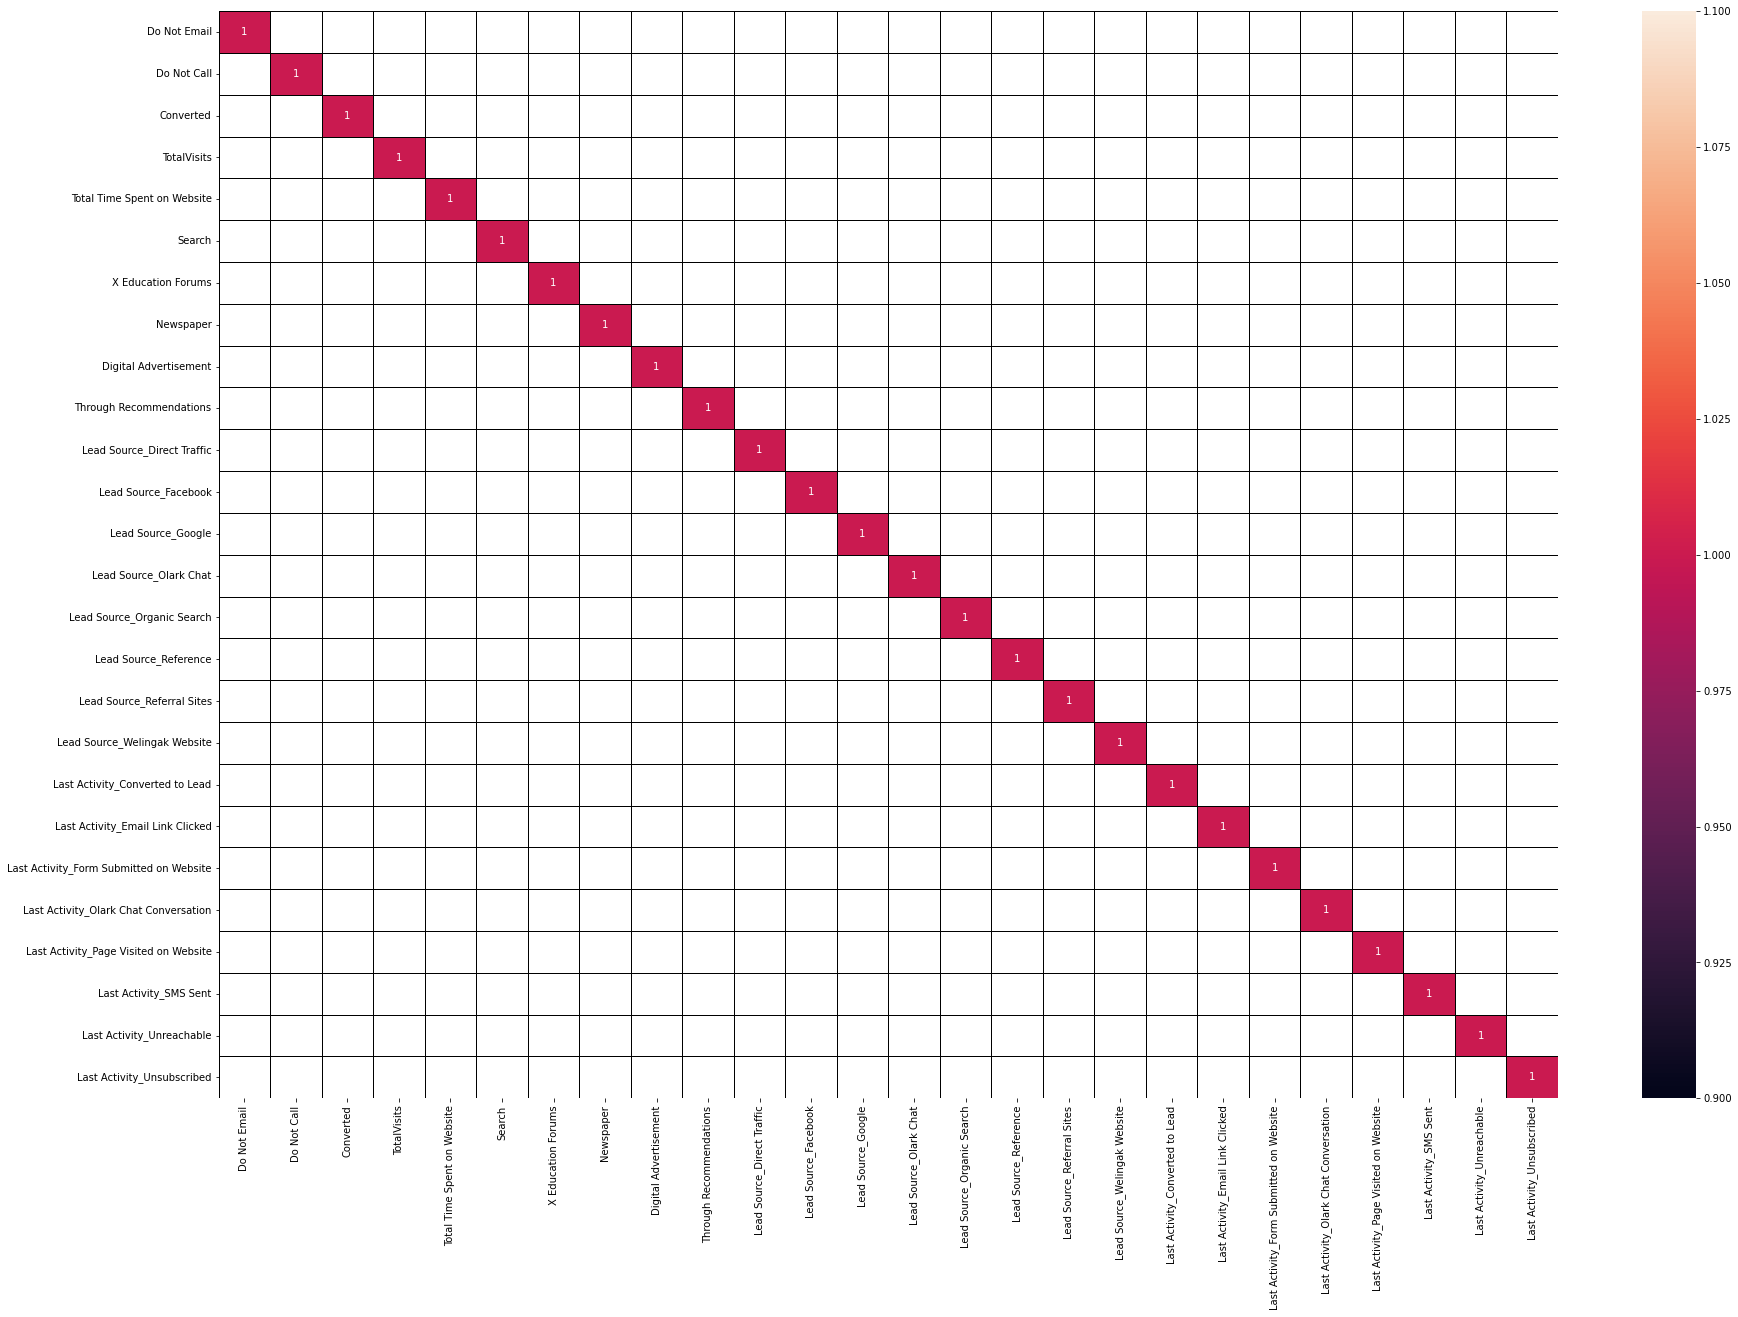

In [80]:
condition=leads.corr()[(leads.corr()>0.5)|(leads.corr()<(-0.5))]
plt.figure(figsize = (30,20))        
sns.heatmap(condition ,annot = True, linewidths=1, linecolor='Black')
plt.show()

In [81]:
#setting the index as the 'Prospect ID' since model cannot take string as input values
leads.set_index('Prospect ID', inplace=True)

### Spliting, Scaling and Feature Selection

In [82]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [83]:
#assigning the independent and response dataframes
X=leads.drop(['Converted'], axis=1)
y=leads['Converted']

In [84]:
#checking the 'Converted' rate
sum(y)/len(y) *100
#this is an acceptable ratio and we can conclude that the class imbalance is low

38.5590465872156

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=50)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [87]:
num_vars=['TotalVisits', 'Total Time Spent on Website']

In [88]:
scaler=StandardScaler()

In [89]:
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])
X_test[num_vars]= scaler.transform(X_test[num_vars])

In [90]:
X_train.shape

(6461, 25)

In [91]:
#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#For feature selection we will try three different methods and select the features which are common from all 3. 
#This will provide a better model building experience and overall model performance
from sklearn.linear_model import LogisticRegression

In [92]:
#Initialising the LR object
logreg=LogisticRegression()

In [93]:
#setting this as a variable so if we want to run the feature selection for a different number of features we only have to make one change
topnfeatures=15

In [94]:
#Method 1 - RFE
rfe=RFE(logreg, topnfeatures)
rfe=rfe.fit(X_train,y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 5),
 ('X Education Forums', False, 6),
 ('Newspaper', False, 11),
 ('Digital Advertisement', False, 7),
 ('Through Recommendations', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 9),
 ('Last Activity_Unsubscribed', True, 1)]

In [96]:
rfe_features=X_train.columns[rfe.support_]
features=pd.DataFrame(rfe_features, columns=['rfe_features'])
features.sort_values(by='rfe_features', inplace=True)

In [97]:
features

rfe_features
0                              Do Not Email
9           Last Activity_Converted to Lead
10         Last Activity_Email Link Clicked
11  Last Activity_Form Submitted on Website
12    Last Activity_Olark Chat Conversation
13                   Last Activity_SMS Sent
14               Last Activity_Unsubscribed
2                Lead Source_Direct Traffic
3                      Lead Source_Facebook
4                        Lead Source_Google
5                Lead Source_Organic Search
6                     Lead Source_Reference
7                Lead Source_Referral Sites
8              Lead Source_Welingak Website
1               Total Time Spent on Website

In [98]:
#Method 2 - Univariate feature selection
uni=SelectKBest(score_func=f_classif, k=topnfeatures)
uni=uni.fit(X_train,y_train)

In [99]:
list(zip(X_train.columns,uni.get_support()))

[('Do Not Email', True),
 ('Do Not Call', False),
 ('TotalVisits', True),
 ('Total Time Spent on Website', True),
 ('Search', False),
 ('X Education Forums', False),
 ('Newspaper', False),
 ('Digital Advertisement', False),
 ('Through Recommendations', False),
 ('Lead Source_Direct Traffic', True),
 ('Lead Source_Facebook', False),
 ('Lead Source_Google', True),
 ('Lead Source_Olark Chat', True),
 ('Lead Source_Organic Search', False),
 ('Lead Source_Reference', True),
 ('Lead Source_Referral Sites', True),
 ('Lead Source_Welingak Website', True),
 ('Last Activity_Converted to Lead', True),
 ('Last Activity_Email Link Clicked', True),
 ('Last Activity_Form Submitted on Website', True),
 ('Last Activity_Olark Chat Conversation', True),
 ('Last Activity_Page Visited on Website', True),
 ('Last Activity_SMS Sent', True),
 ('Last Activity_Unreachable', False),
 ('Last Activity_Unsubscribed', False)]

In [100]:
uni_features=X_train.columns[uni.get_support()]
features['uni_features']=uni_features.sort_values()
features

rfe_features  \
0                              Do Not Email   
9           Last Activity_Converted to Lead   
10         Last Activity_Email Link Clicked   
11  Last Activity_Form Submitted on Website   
12    Last Activity_Olark Chat Conversation   
13                   Last Activity_SMS Sent   
14               Last Activity_Unsubscribed   
2                Lead Source_Direct Traffic   
3                      Lead Source_Facebook   
4                        Lead Source_Google   
5                Lead Source_Organic Search   
6                     Lead Source_Reference   
7                Lead Source_Referral Sites   
8              Lead Source_Welingak Website   
1               Total Time Spent on Website   

                               uni_features  
0                              Do Not Email  
9           Last Activity_Converted to Lead  
10         Last Activity_Email Link Clicked  
11  Last Activity_Form Submitted on Website  
12    Last Activity_Olark Chat Conversation  
13    Last Activity_Page Visited on Website  
14                   Last Activity_SMS Sent  
2                Lead Source_Direct Traffic  
3                        Lead Source_Google  
4                    Lead Source_Olark Chat  
5                     Lead Source_Reference  
6                Lead Source_Referral Sites  
7              Lead Source_Welingak Website  
8               Total Time Spent on Website  
1                               TotalVisits

In [101]:
#Method 3 - Using corr matrix to judge which variables have a high corrleation with the target varaible
cor=leads.corr()
#storing the absolute values of the correlation coeficient for the target variable
cor_target=abs(cor['Converted'])
#sorting the values in descending order
cor_feaures=cor_target.sort_values(ascending=False)

In [102]:
cor_feaures

Converted                                  1.000000
Total Time Spent on Website                0.362918
Last Activity_SMS Sent                     0.325772
Lead Source_Reference                      0.270857
Last Activity_Olark Chat Conversation      0.211058
Lead Source_Welingak Website               0.154172
Do Not Email                               0.134368
Lead Source_Olark Chat                     0.129733
Last Activity_Converted to Lead            0.117529
Last Activity_Page Visited on Website      0.083458
Lead Source_Direct Traffic                 0.080211
TotalVisits                                0.045462
Last Activity_Email Link Clicked           0.039780
Last Activity_Form Submitted on Website    0.033426
Lead Source_Referral Sites                 0.031889
Lead Source_Google                         0.026024
Lead Source_Facebook                       0.023737
Last Activity_Unsubscribed                 0.020661
Through Recommendations                    0.018604
Do Not Call 

In [103]:
#drop the target variable from this Series and pick the top n features from the list
cor_feaures.drop(index='Converted', inplace=True)
cor_feaures[:topnfeatures]

Total Time Spent on Website                0.362918
Last Activity_SMS Sent                     0.325772
Lead Source_Reference                      0.270857
Last Activity_Olark Chat Conversation      0.211058
Lead Source_Welingak Website               0.154172
Do Not Email                               0.134368
Lead Source_Olark Chat                     0.129733
Last Activity_Converted to Lead            0.117529
Last Activity_Page Visited on Website      0.083458
Lead Source_Direct Traffic                 0.080211
TotalVisits                                0.045462
Last Activity_Email Link Clicked           0.039780
Last Activity_Form Submitted on Website    0.033426
Lead Source_Referral Sites                 0.031889
Lead Source_Google                         0.026024
Name: Converted, dtype: float64

In [104]:
features['cor_features']=cor_feaures[:topnfeatures].index.sort_values()
features

rfe_features  \
0                              Do Not Email   
9           Last Activity_Converted to Lead   
10         Last Activity_Email Link Clicked   
11  Last Activity_Form Submitted on Website   
12    Last Activity_Olark Chat Conversation   
13                   Last Activity_SMS Sent   
14               Last Activity_Unsubscribed   
2                Lead Source_Direct Traffic   
3                      Lead Source_Facebook   
4                        Lead Source_Google   
5                Lead Source_Organic Search   
6                     Lead Source_Reference   
7                Lead Source_Referral Sites   
8              Lead Source_Welingak Website   
1               Total Time Spent on Website   

                               uni_features  \
0                              Do Not Email   
9           Last Activity_Converted to Lead   
10         Last Activity_Email Link Clicked   
11  Last Activity_Form Submitted on Website   
12    Last Activity_Olark Chat Conversation   
13    Last Activity_Page Visited on Website   
14                   Last Activity_SMS Sent   
2                Lead Source_Direct Traffic   
3                        Lead Source_Google   
4                    Lead Source_Olark Chat   
5                     Lead Source_Reference   
6                Lead Source_Referral Sites   
7              Lead Source_Welingak Website   
8               Total Time Spent on Website   
1                               TotalVisits   

                               cor_features  
0                              Do Not Email  
9           Last Activity_Converted to Lead  
10         Last Activity_Email Link Clicked  
11  Last Activity_Form Submitted on Website  
12    Last Activity_Olark Chat Conversation  
13    Last Activity_Page Visited on Website  
14                   Last Activity_SMS Sent  
2                Lead Source_Direct Traffic  
3                        Lead Source_Google  
4                    Lead Source_Olark Chat  
5                     Lead Source_Reference  
6                Lead Source_Referral Sites  
7              Lead Source_Welingak Website  
8               Total Time Spent on Website  
1                               TotalVisits

In [105]:
features.reset_index(inplace=True)
features.drop('index', 1, inplace=True)

In [106]:
features['All matched']=features.rfe_features.apply(lambda x: True if (x in list(features.uni_features) 
                                                                       and x in list(features.cor_features)) else False)

In [107]:
features['rfe & uni']=features.rfe_features.apply(lambda x: True if x in list(features.uni_features) else False)

In [108]:
features['rfe & cor']=features.rfe_features.apply(lambda x: True if x in list(features.cor_features) else False)

In [109]:
features['uni & cor']=features.uni_features.apply(lambda x: True if x in list(features.cor_features) else False)
features

rfe_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5                    Last Activity_SMS Sent   
6                Last Activity_Unsubscribed   
7                Lead Source_Direct Traffic   
8                      Lead Source_Facebook   
9                        Lead Source_Google   
10               Lead Source_Organic Search   
11                    Lead Source_Reference   
12               Lead Source_Referral Sites   
13             Lead Source_Welingak Website   
14              Total Time Spent on Website   

                               uni_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5     Last Activity_Page Visited on Website   
6                    Last Activity_SMS Sent   
7                Lead Source_Direct Traffic   
8                        Lead Source_Google   
9                    Lead Source_Olark Chat   
10                    Lead Source_Reference   
11               Lead Source_Referral Sites   
12             Lead Source_Welingak Website   
13              Total Time Spent on Website   
14                              TotalVisits   

                               cor_features  All matched  rfe & uni  \
0                              Do Not Email         True       True   
1           Last Activity_Converted to Lead         True       True   
2          Last Activity_Email Link Clicked         True       True   
3   Last Activity_Form Submitted on Website         True       True   
4     Last Activity_Olark Chat Conversation         True       True   
5     Last Activity_Page Visited on Website         True       True   
6                    Last Activity_SMS Sent        False      False   
7                Lead Source_Direct Traffic         True       True   
8                        Lead Source_Google        False      False   
9                    Lead Source_Olark Chat         True       True   
10                    Lead Source_Reference        False      False   
11               Lead Source_Referral Sites         True       True   
12             Lead Source_Welingak Website         True       True   
13              Total Time Spent on Website         True       True   
14                              TotalVisits         True       True   

    rfe & cor  uni & cor  
0        True       True  
1        True       True  
2        True       True  
3        True       True  
4        True       True  
5        True       True  
6       False       True  
7        True       True  
8       False       True  
9        True       True  
10      False       True  
11       True       True  
12       True       True  
13       True       True  
14       True       True

In [110]:
#Count the number to common features for selection
features['True count'] = (features.iloc[:,3:]==True).sum(axis=1)
features

rfe_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5                    Last Activity_SMS Sent   
6                Last Activity_Unsubscribed   
7                Lead Source_Direct Traffic   
8                      Lead Source_Facebook   
9                        Lead Source_Google   
10               Lead Source_Organic Search   
11                    Lead Source_Reference   
12               Lead Source_Referral Sites   
13             Lead Source_Welingak Website   
14              Total Time Spent on Website   

                               uni_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5     Last Activity_Page Visited on Website   
6                    Last Activity_SMS Sent   
7                Lead Source_Direct Traffic   
8                        Lead Source_Google   
9                    Lead Source_Olark Chat   
10                    Lead Source_Reference   
11               Lead Source_Referral Sites   
12             Lead Source_Welingak Website   
13              Total Time Spent on Website   
14                              TotalVisits   

                               cor_features  All matched  rfe & uni  \
0                              Do Not Email         True       True   
1           Last Activity_Converted to Lead         True       True   
2          Last Activity_Email Link Clicked         True       True   
3   Last Activity_Form Submitted on Website         True       True   
4     Last Activity_Olark Chat Conversation         True       True   
5     Last Activity_Page Visited on Website         True       True   
6                    Last Activity_SMS Sent        False      False   
7                Lead Source_Direct Traffic         True       True   
8                        Lead Source_Google        False      False   
9                    Lead Source_Olark Chat         True       True   
10                    Lead Source_Reference        False      False   
11               Lead Source_Referral Sites         True       True   
12             Lead Source_Welingak Website         True       True   
13              Total Time Spent on Website         True       True   
14                              TotalVisits         True       True   

    rfe & cor  uni & cor  True count  
0        True       True           4  
1        True       True           4  
2        True       True           4  
3        True       True           4  
4        True       True           4  
5        True       True           4  
6       False       True           1  
7        True       True           4  
8       False       True           1  
9        True       True           4  
10      False       True           1  
11       True       True           4  
12       True       True           4  
13       True       True           4  
14       True       True           4

In [111]:
relevant_features=features[features['True count']>2]
relevant_features.reset_index(inplace=True)
relevant_features.drop('index', 1, inplace=True)
relevant_features

rfe_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5                    Last Activity_SMS Sent   
6                Lead Source_Direct Traffic   
7                        Lead Source_Google   
8                     Lead Source_Reference   
9                Lead Source_Referral Sites   
10             Lead Source_Welingak Website   
11              Total Time Spent on Website   

                               uni_features  \
0                              Do Not Email   
1           Last Activity_Converted to Lead   
2          Last Activity_Email Link Clicked   
3   Last Activity_Form Submitted on Website   
4     Last Activity_Olark Chat Conversation   
5     Last Activity_Page Visited on Website   
6                Lead Source_Direct Traffic   
7                    Lead Source_Olark Chat   
8                Lead Source_Referral Sites   
9              Lead Source_Welingak Website   
10              Total Time Spent on Website   
11                              TotalVisits   

                               cor_features  All matched  rfe & uni  \
0                              Do Not Email         True       True   
1           Last Activity_Converted to Lead         True       True   
2          Last Activity_Email Link Clicked         True       True   
3   Last Activity_Form Submitted on Website         True       True   
4     Last Activity_Olark Chat Conversation         True       True   
5     Last Activity_Page Visited on Website         True       True   
6                Lead Source_Direct Traffic         True       True   
7                    Lead Source_Olark Chat         True       True   
8                Lead Source_Referral Sites         True       True   
9              Lead Source_Welingak Website         True       True   
10              Total Time Spent on Website         True       True   
11                              TotalVisits         True       True   

    rfe & cor  uni & cor  True count  
0        True       True           4  
1        True       True           4  
2        True       True           4  
3        True       True           4  
4        True       True           4  
5        True       True           4  
6        True       True           4  
7        True       True           4  
8        True       True           4  
9        True       True           4  
10       True       True           4  
11       True       True           4

In [112]:
#From the relevant features list we choose the first column to build our model with 
model_features= relevant_features.rfe_features.to_list()
#adding those features which are not present in rfe but in the other 2 columns
model_features.extend(['Do Not Call','TotalVisits'])
model_features

['Do Not Email',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Link Clicked',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Total Time Spent on Website',
 'Do Not Call',
 'TotalVisits']

### Model Building

In [113]:
import statsmodels.api as sm

In [114]:
X_train_new=X_train[model_features]
logm1=sm.GLM(y_train, sm.add_constant(X_train_new), family=sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2999.9
Date:                Sat, 21 Jan 2023   Deviance:                       5999.8
Time:                        17:10:14   Pearson chi2:                 6.66e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [115]:
#looking at the p-values we can see that he 'Do Not Call feature is the most insignificant so we can drop it'
X_train_new.drop('Do Not Call', axis=1, inplace=True)

In [116]:
logm2=sm.GLM(y_train, sm.add_constant(X_train_new), family=sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.7
Date:                Sat, 21 Jan 2023   Deviance:                       6001.4
Time:                        17:10:14   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [117]:
X_train_new.drop('TotalVisits', axis=1, inplace=True)

In [118]:
logm3=sm.GLM(y_train, sm.add_constant(X_train_new), family=sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.8
Date:                Sat, 21 Jan 2023   Deviance:                       6003.5
Time:                        17:10:14   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [119]:
X_train_new.drop('Lead Source_Referral Sites', axis=1, inplace=True)

In [120]:
logm4=sm.GLM(y_train, sm.add_constant(X_train_new), family=sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3003.6
Date:                Sat, 21 Jan 2023   Deviance:                       6007.2
Time:                        17:10:14   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [121]:
#since all the p-values are below 0.05 we can move to the next step
#Now we check for multicolinearity by calcualting the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
def VIF(df):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

In [123]:
VIF(X_train_new)

features   VIF
5                    Last Activity_SMS Sent  1.36
7                        Lead Source_Google  1.30
6                Lead Source_Direct Traffic  1.27
10              Total Time Spent on Website  1.13
0                              Do Not Email  1.09
1           Last Activity_Converted to Lead  1.07
4     Last Activity_Olark Chat Conversation  1.07
8                     Lead Source_Reference  1.06
2          Last Activity_Email Link Clicked  1.03
3   Last Activity_Form Submitted on Website  1.03
9              Lead Source_Welingak Website  1.03

In [124]:
#since none of the VIF are above 5, we have already eliminated multicolinearity and we can proceed to model evaluation

### Model Evaluation

In [125]:
y_train_pred=logm4.predict(sm.add_constant(X_train_new))
y_train_pred_final=pd.DataFrame(y_train, columns=['Converted','Converted_Prob','Predicted'])
y_train_pred_final['Converted_Prob']=y_train_pred.to_numpy()
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.5 else 0)
#choosing the threshold value as 0.5 for now

In [126]:
y_train_pred_final

Converted  Converted_Prob  Predicted
Prospect ID                                                               
8136361c-5fcb-4213-832d-5f0e488af8a2          1        0.856383          1
acb2e641-8dd4-4642-819d-114152b2a951          1        0.268216          0
6c8b48b3-e905-4c99-b9d6-5efa26de2866          0        0.150950          0
bae0d183-f390-4d1e-bcb9-e76ae0cfd888          1        0.441738          0
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e          0        0.130445          0
...                                         ...             ...        ...
7ad2d526-b404-45ee-89f8-6839aacd70cd          0        0.114212          0
12f62f0e-49d0-45c1-9ef2-31ae076d5060          0        0.227711          0
8f834368-5690-48d4-b5fc-add7e58b0d44          1        0.421699          0
97750152-a3fa-4b94-974a-7c28452f892b          0        0.108906          0
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12          1        0.142854          0

[6461 rows x 3 columns]

In [127]:
from sklearn import metrics

In [128]:
print(metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted))

[[3451  503]
 [ 932 1575]]


In [129]:
# Predicted      not_Converted    Converted
# Actual
# not_Converted       3503         451
# Converted           937          1570 

In [130]:
#calculating the accuracy for the final model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7778981581798483


In [131]:
#since accuracy is not always the best measure for the classification problems, we also need to measure additional metrics
#like precision and recall
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
#precision
precision=TP/float(TP+FP)
print("Precision = {}".format(precision))
recall=TP/float(TP+FN)
print(f'Recall = {recall}')

Precision = 0.7579403272377286
Recall = 0.6282409254088552


In [133]:
#verifying the calcualtions are correct
from sklearn.metrics import precision_score, recall_score

In [134]:
print(f'Precision= {precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)}')
print(f'Recall= {recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)}')

Precision= 0.7579403272377286
Recall= 0.6282409254088552


In [135]:
#since our recall is a bit on the lower side we need to improve it by choosing a better threshold value
#we can do this by plotting the ROC curve and the precision_recall curve
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

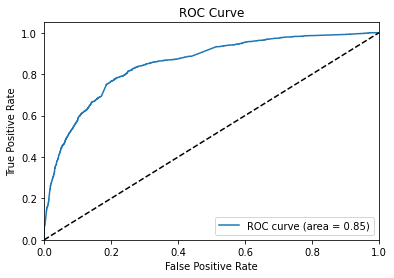

In [136]:
fpr, tpr, thresholds= roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate=False)
auc_score=roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

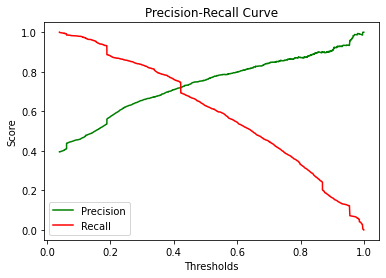

In [137]:
#so from the ROC curve we can see that our choice of 0.5 as the threshold was sub-optimal. It should have been closer to 0.2
# this can be further verified by plotting the precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [138]:
#from this we can see that the optimal threshold is close to 0.4. Therfore we will try few different values of thresholds and try 
#to maximize precision and recall scores, focusing on recall since that is our relevant metric

In [139]:
y_train_pred_final['Predicted_0.2']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.2 else 0)
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.2'])
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.2'])
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.2'])
print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy= 0.6991177836248259
Precision= 0.5730978966502207
Recall= 0.8803350618268847


In [140]:
y_train_pred_final['Predicted_0.25']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.25 else 0)
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.25'])
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.25'])
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.25'])
print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy= 0.744466800804829
Precision= 0.6241299303944315
Recall= 0.8583964898284803


In [141]:
y_train_pred_final['Predicted_0.3']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.3 else 0)
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.3'])
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.3'])
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.3'])
print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy= 0.7653613991642161
Precision= 0.6549890522364717
Recall= 0.8352612684483446


In [142]:
y_train_pred_final['Predicted_0.35']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.35 else 0)
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.35'])
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.35'])
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.35'])
print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy= 0.7741835629159572
Precision= 0.678352620830497
Recall= 0.7949740725967291


In [143]:
y_train_pred_final['Predicted_0.4']=y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x>0.4 else 0)
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.4'])
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.4'])
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.4'])
print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy= 0.7867203219315896
Precision= 0.7096175269216487
Recall= 0.7622656561627443


In [144]:
#so we can see that as we are increasing the threshold there is a trade-off between precision and recall.
#from the scores we can see that 0.3 and 0.4 have a decent score for both precision and recall. 
#In our business case we should try to reduce the number of false negatives since those are customers who would've converted
#if the leads were pursued - meaning we should look to maximize recall without reducing precision too much.
#Keeping this in mind the value of 0.3 as threshlod seems to be optimal for our case
y_train_pred_final

Converted  Converted_Prob  Predicted  \
Prospect ID                                                                  
8136361c-5fcb-4213-832d-5f0e488af8a2          1        0.856383          1   
acb2e641-8dd4-4642-819d-114152b2a951          1        0.268216          0   
6c8b48b3-e905-4c99-b9d6-5efa26de2866          0        0.150950          0   
bae0d183-f390-4d1e-bcb9-e76ae0cfd888          1        0.441738          0   
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e          0        0.130445          0   
...                                         ...             ...        ...   
7ad2d526-b404-45ee-89f8-6839aacd70cd          0        0.114212          0   
12f62f0e-49d0-45c1-9ef2-31ae076d5060          0        0.227711          0   
8f834368-5690-48d4-b5fc-add7e58b0d44          1        0.421699          0   
97750152-a3fa-4b94-974a-7c28452f892b          0        0.108906          0   
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12          1        0.142854          0   

                                      Predicted_0.2  Predicted_0.25  \
Prospect ID                                                           
8136361c-5fcb-4213-832d-5f0e488af8a2              1               1   
acb2e641-8dd4-4642-819d-114152b2a951              1               1   
6c8b48b3-e905-4c99-b9d6-5efa26de2866              0               0   
bae0d183-f390-4d1e-bcb9-e76ae0cfd888              1               1   
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e              0               0   
...                                             ...             ...   
7ad2d526-b404-45ee-89f8-6839aacd70cd              0               0   
12f62f0e-49d0-45c1-9ef2-31ae076d5060              1               0   
8f834368-5690-48d4-b5fc-add7e58b0d44              1               1   
97750152-a3fa-4b94-974a-7c28452f892b              0               0   
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12              0               0   

                                      Predicted_0.3  Predicted_0.35  \
Prospect ID                                                           
8136361c-5fcb-4213-832d-5f0e488af8a2              1               1   
acb2e641-8dd4-4642-819d-114152b2a951              0               0   
6c8b48b3-e905-4c99-b9d6-5efa26de2866              0               0   
bae0d183-f390-4d1e-bcb9-e76ae0cfd888              1               1   
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e              0               0   
...                                             ...             ...   
7ad2d526-b404-45ee-89f8-6839aacd70cd              0               0   
12f62f0e-49d0-45c1-9ef2-31ae076d5060              0               0   
8f834368-5690-48d4-b5fc-add7e58b0d44              1               1   
97750152-a3fa-4b94-974a-7c28452f892b              0               0   
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12              0               0   

                                      Predicted_0.4  
Prospect ID                                          
8136361c-5fcb-4213-832d-5f0e488af8a2              1  
acb2e641-8dd4-4642-819d-114152b2a951              0  
6c8b48b3-e905-4c99-b9d6-5efa26de2866              0  
bae0d183-f390-4d1e-bcb9-e76ae0cfd888              1  
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e              0  
...                                             ...  
7ad2d526-b404-45ee-89f8-6839aacd70cd              0  
12f62f0e-49d0-45c1-9ef2-31ae076d5060              0  
8f834368-5690-48d4-b5fc-add7e58b0d44              1  
97750152-a3fa-4b94-974a-7c28452f892b              0  
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12              0  

[6461 rows x 8 columns]

In [145]:
#restructuring the dataframe
lst=['Predicted','Predicted_0.2','Predicted_0.25','Predicted_0.35','Predicted_0.4']
y_train_pred_final.drop(lst ,axis=1, inplace=True)
y_train_pred_final.rename(columns={'Predicted_0.3':'Final_Predicted'}, inplace=True)
y_train_pred_final

Converted  Converted_Prob  \
Prospect ID                                                       
8136361c-5fcb-4213-832d-5f0e488af8a2          1        0.856383   
acb2e641-8dd4-4642-819d-114152b2a951          1        0.268216   
6c8b48b3-e905-4c99-b9d6-5efa26de2866          0        0.150950   
bae0d183-f390-4d1e-bcb9-e76ae0cfd888          1        0.441738   
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e          0        0.130445   
...                                         ...             ...   
7ad2d526-b404-45ee-89f8-6839aacd70cd          0        0.114212   
12f62f0e-49d0-45c1-9ef2-31ae076d5060          0        0.227711   
8f834368-5690-48d4-b5fc-add7e58b0d44          1        0.421699   
97750152-a3fa-4b94-974a-7c28452f892b          0        0.108906   
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12          1        0.142854   

                                      Final_Predicted  
Prospect ID                                            
8136361c-5fcb-4213-832d-5f0e488af8a2                1  
acb2e641-8dd4-4642-819d-114152b2a951                0  
6c8b48b3-e905-4c99-b9d6-5efa26de2866                0  
bae0d183-f390-4d1e-bcb9-e76ae0cfd888                1  
3a617dff-fcc4-4a4d-b89d-0c3f35073c9e                0  
...                                               ...  
7ad2d526-b404-45ee-89f8-6839aacd70cd                0  
12f62f0e-49d0-45c1-9ef2-31ae076d5060                0  
8f834368-5690-48d4-b5fc-add7e58b0d44                1  
97750152-a3fa-4b94-974a-7c28452f892b                0  
0cf7dbfd-36c8-4ba3-8dae-3afdad0cec12                0  

[6461 rows x 3 columns]

### Making Predictions on the test set

In [146]:
final_features=X_train_new.columns
X_test=X_test[final_features]
X_test.head()

Do Not Email  \
Prospect ID                                          
52a20b92-5a45-499e-8631-d958713adab1             1   
891e04ef-6ac2-4d6e-a308-f1d2517daee5             0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a             0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5             0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2             0   

                                      Last Activity_Converted to Lead  \
Prospect ID                                                             
52a20b92-5a45-499e-8631-d958713adab1                                0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                                0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                                0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                                0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                                0   

                                      Last Activity_Email Link Clicked  \
Prospect ID                                                              
52a20b92-5a45-499e-8631-d958713adab1                                 0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                                 0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                                 0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                                 0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                                 0   

                                      Last Activity_Form Submitted on Website  \
Prospect ID                                                                     
52a20b92-5a45-499e-8631-d958713adab1                                        0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                                        0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                                        0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                                        0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                                        0   

                                      Last Activity_Olark Chat Conversation  \
Prospect ID                                                                   
52a20b92-5a45-499e-8631-d958713adab1                                      0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                                      0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                                      0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                                      0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                                      0   

                                      Last Activity_SMS Sent  \
Prospect ID                                                    
52a20b92-5a45-499e-8631-d958713adab1                       0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                       0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                       1   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                       0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                       1   

                                      Lead Source_Direct Traffic  \
Prospect ID                                                        
52a20b92-5a45-499e-8631-d958713adab1                           0   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                           0   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                           0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                           0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                           0   

                                      Lead Source_Google  \
Prospect ID                                                
52a20b92-5a45-499e-8631-d958713adab1                   1   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                   1   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                   0   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                   0   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                   0   

                                      Lead Source_Reference  \
Prospect ID                                                   
52a20b92-5a45-499e-8631-d958713ad

In [147]:
y_test_pred=logm4.predict(sm.add_constant(X_test))
y_test_pred_final=pd.DataFrame(y_test, columns=['Converted','Converted_Prob','Predicted'])
y_test_pred_final['Converted_Prob']=y_test_pred.to_numpy()
y_test_pred_final['Predicted']= y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x>0.3 else 0)

In [148]:
y_test_pred_final

Converted  Converted_Prob  Predicted
Prospect ID                                                               
52a20b92-5a45-499e-8631-d958713adab1          0        0.048139          0
891e04ef-6ac2-4d6e-a308-f1d2517daee5          1        0.485185          1
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a          1        0.712273          1
0c73eba1-4963-4a03-9f9d-b4afb1dacef5          0        0.188792          0
81a23cd8-e8ca-4484-afbd-02ed7366cee2          0        0.505518          1
...                                         ...             ...        ...
d1af0b05-e77f-4111-811c-7c7abe1919e2          0        0.169144          0
c9bbd996-a573-453d-b1f7-a52f3971ac7e          0        0.143390          0
a0f34735-cbbf-49f1-aac1-fbed6695ef0f          1        0.771470          1
623c7e43-c80c-44ef-a640-2815873ab838          1        0.637155          1
f4f94e42-16f3-47b5-946a-11b7909421f0          0        0.628980          1

[2769 rows x 3 columns]

In [149]:
train_precision=precision_score(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
train_recall=recall_score(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
train_accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
print(f"Training Accuracy= {train_accuracy}")
print(f"Training Precision= {train_precision}")
print(f"Training Recall= {train_recall}")

Training Accuracy= 0.7653613991642161
Training Precision= 0.6549890522364717
Training Recall= 0.8352612684483446


In [150]:
test_precision=precision_score(y_test_pred_final.Converted, y_test_pred_final['Predicted'])
test_recall=recall_score(y_test_pred_final.Converted, y_test_pred_final['Predicted'])
test_accuracy=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['Predicted'])
print(f"Test Accuracy= {test_accuracy}")
print(f"Test Precision= {test_precision}")
print(f"Test Recall= {test_recall}")

Test Accuracy= 0.7789815817984832
Test Precision= 0.6624815361890695
Test Recall= 0.8526615969581749


In [151]:
from sklearn.metrics import classification_report

In [152]:
#training set classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      3954
           1       0.65      0.84      0.73      2507

    accuracy                           0.77      6461
   macro avg       0.76      0.78      0.76      6461
weighted avg       0.79      0.77      0.77      6461



In [153]:
#test set classification report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1717
           1       0.66      0.85      0.75      1052

    accuracy                           0.78      2769
   macro avg       0.78      0.79      0.78      2769
weighted avg       0.80      0.78      0.78      2769



In [154]:
metrics_dict={"Training Metrics":{'Accuracy':round(train_accuracy,3), 'Precision':round(train_precision,3), 'Recall': round(train_recall,3)}, 
         "Test Metrics":{'Accuracy':round(test_accuracy,3), 'Precision':round(test_precision,3), 'Recall': round(test_recall,3)}}
metrics_df=pd.DataFrame(metrics_dict)
metrics_df

Training Metrics  Test Metrics
Accuracy              0.765         0.779
Precision             0.655         0.662
Recall                0.835         0.853

In [155]:
#Therefore we can clearly see that since the training and test metrics are similar, the model can generalize well on unseen data
#The recall score is sufficiently high enough to achieve a good conversion rate without wasting time chasing too many leads

In [156]:
### Now we will assign the scores and model recommendations in the original dataframe against the Prospect ID
final_pred=logm4.predict(sm.add_constant(leads[final_features]))
recommended_leads=pd.DataFrame(leads.index, columns=['Lead Score', 'Recommendation'])
recommended_leads['Lead Score']=(final_pred.to_numpy()*100)
recommended_leads['Lead Score']=round(recommended_leads['Lead Score'],2)
recommended_leads['Recommendation']=recommended_leads['Lead Score'].apply(lambda x: 'Yes' if x>30 else 'No')

In [157]:
recommended_leads

Lead Score Recommendation
0          36.57            Yes
1         100.00            Yes
2         100.00            Yes
3         100.00            Yes
4         100.00            Yes
...          ...            ...
9225      100.00            Yes
9226      100.00            Yes
9227      100.00            Yes
9228      100.00            Yes
9229      100.00            Yes

[9230 rows x 2 columns]

In [158]:
recommended_leads.value_counts()

Lead Score  Recommendation
100.00      Yes               6933
14.02       No                 615
36.57       Yes                575
64.36       Yes                284
98.10       Yes                209
                              ... 
98.03       Yes                  1
97.94       Yes                  1
95.88       Yes                  1
97.67       Yes                  1
18.42       No                   1
Length: 76, dtype: int64

In [159]:
#the reason why so many values are showing a score of 100 is because we are applying our model on the original 
#dataset which contains the training set as well. So on the model is overfitting on those data points.
#we can generalize this approach of assigning a score to an unseen dataset for more realistic results
#this can be see more clearly if we present the test set in this format, as shown below

In [160]:
recommended_leads_test=y_test_pred_final
recommended_leads_test.rename({'Converted':'Original Converted','Converted_Prob':'Lead Score','Predicted':'Recommendation'},axis=1,inplace=True)

In [161]:
recommended_leads_test['Original Converted']=recommended_leads_test['Original Converted'].apply(lambda x:'Yes' if x==1 else 'No')
recommended_leads_test['Recommendation']=recommended_leads_test['Recommendation'].apply(lambda x:'Yes' if x==1 else 'No')
recommended_leads_test['Lead Score']=recommended_leads_test['Lead Score'].apply(lambda x: round((x*100),2))

In [162]:
recommended_leads_test

Original Converted  Lead Score  \
Prospect ID                                                           
52a20b92-5a45-499e-8631-d958713adab1                 No        4.81   
891e04ef-6ac2-4d6e-a308-f1d2517daee5                Yes       48.52   
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a                Yes       71.23   
0c73eba1-4963-4a03-9f9d-b4afb1dacef5                 No       18.88   
81a23cd8-e8ca-4484-afbd-02ed7366cee2                 No       50.55   
...                                                 ...         ...   
d1af0b05-e77f-4111-811c-7c7abe1919e2                 No       16.91   
c9bbd996-a573-453d-b1f7-a52f3971ac7e                 No       14.34   
a0f34735-cbbf-49f1-aac1-fbed6695ef0f                Yes       77.15   
623c7e43-c80c-44ef-a640-2815873ab838                Yes       63.72   
f4f94e42-16f3-47b5-946a-11b7909421f0                 No       62.90   

                                     Recommendation  
Prospect ID                                          
52a20b92-5a45-499e-8631-d958713adab1             No  
891e04ef-6ac2-4d6e-a308-f1d2517daee5            Yes  
ae107016-c7dc-49a2-bd3d-6daa1ad4de1a            Yes  
0c73eba1-4963-4a03-9f9d-b4afb1dacef5             No  
81a23cd8-e8ca-4484-afbd-02ed7366cee2            Yes  
...                                             ...  
d1af0b05-e77f-4111-811c-7c7abe1919e2             No  
c9bbd996-a573-453d-b1f7-a52f3971ac7e             No  
a0f34735-cbbf-49f1-aac1-fbed6695ef0f            Yes  
623c7e43-c80c-44ef-a640-2815873ab838            Yes  
f4f94e42-16f3-47b5-946a-11b7909421f0            Yes  

[2769 rows x 3 columns]

In [163]:
#Similarly if we apply this model on an unseen dataset and we can get a conversion rate of upto 85% on the leads 
#This can be increased over time as we get more data and retrain the model.
recommended_leads_test.value_counts()

Original Converted  Lead Score  Recommendation
No                  6.17        No                191
                    18.88       No                133
Yes                 42.17       Yes                71
                    95.41       Yes                66
                    86.91       Yes                49
                                                 ... 
No                  28.32       No                  1
                    28.30       No                  1
                    28.29       No                  1
                    28.26       No                  1
                    50.50       Yes                 1
Length: 1884, dtype: int64